In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [42]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/u_data.csv')
df.head()

,user_id,item_id,timestamp,RaTING
0,0,1,44484844,5
1,0,2,44848444,4
2,186,3,15484844,3
3,176,4,18488484,2
4,0,5,51848451,5


In [43]:
movie_titles = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Movie_Id_Titles.csv')
movie_titles.head()

,item_id,title
0,1,Toy
1,2,Story
2,3,Rose
3,4,Wordha
4,5,Love


In [44]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,timestamp,RaTING,title
0,0,1,44484844,5,Toy
1,0,2,44848444,4,Story
2,186,3,15484844,3,Rose
3,176,4,18488484,2,Wordha
4,0,5,51848451,5,Love


In [45]:
df.groupby('title')['RaTING'].count().sort_values(ascending=False).head()

,RaTING
title,
Love,1
Rose,1
Story,1
Toy,1
Wordha,1


In [46]:
df.groupby('title')['RaTING'].mean().sort_values(ascending=False).head()

,RaTING
title,
Love,5.0
Toy,5.0
Story,4.0
Rose,3.0
Wordha,2.0


In [47]:
ratings = pd.DataFrame(df.groupby('title')['RaTING'].mean())
ratings.head()

,RaTING
title,
Love,5.0
Rose,3.0
Story,4.0
Toy,5.0
Wordha,2.0


In [48]:
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('title')['RaTING'].count())
ratings.head()

,RaTING,num_of_ratings
title,,
Love,5.0,1
Rose,3.0,1
Story,4.0,1
Toy,5.0,1
Wordha,2.0,1


<Axes: >

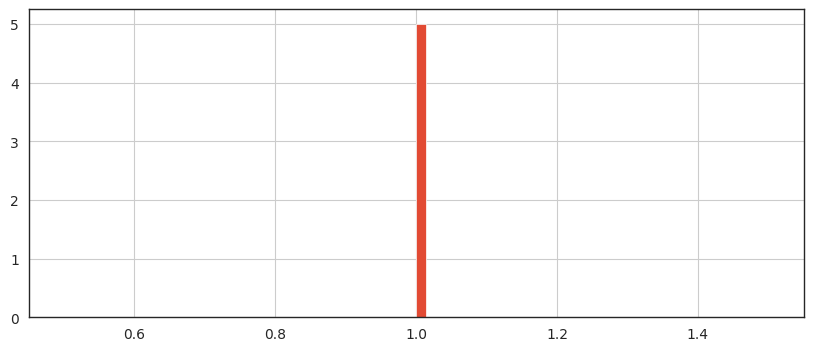

In [49]:
plt.figure(figsize=(10,4))
ratings['num_of_ratings'].hist(bins=70)

<Axes: >

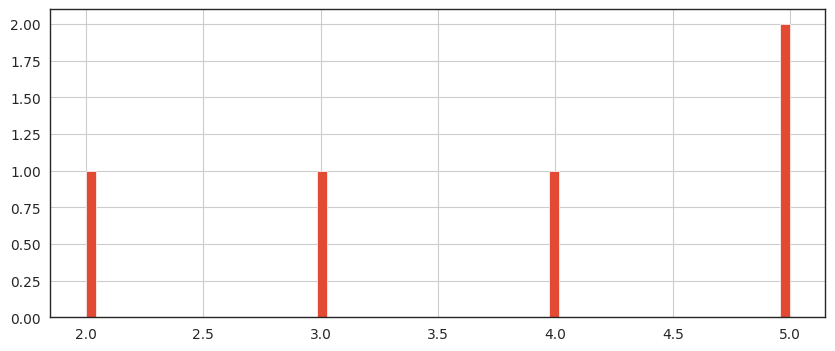

In [50]:
plt.figure(figsize=(10,4))
ratings['RaTING'].hist(bins=70)

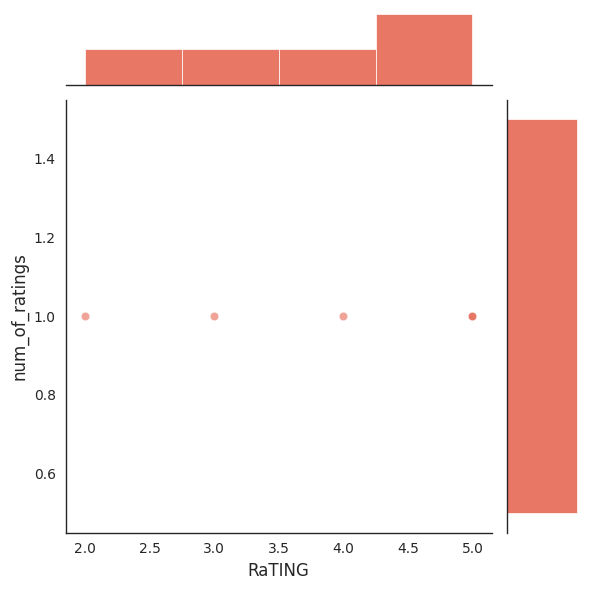

In [51]:
sns.jointplot(x='RaTING', y='num_of_ratings', data=ratings, alpha=0.5)

In [52]:
moviemat = df.pivot_table(index='user_id', columns='title', values='RaTING')
moviemat.head()

title,Love,Rose,Story,Toy,Wordha
user_id,,,,,
0,5.0,NaN,4.0,5.0,NaN
176,NaN,NaN,NaN,NaN,2.0
186,NaN,3.0,NaN,NaN,NaN


In [53]:
ratings.sort_values('num_of_ratings', ascending=False).head(10)

,RaTING,num_of_ratings
title,,
Love,5.0,1
Rose,3.0,1
Story,4.0,1
Toy,5.0,1
Wordha,2.0,1


In [54]:
love_user_rating=moviemat['Love']
rose_user_rating=moviemat['Rose']
love_user_rating.head()

,Love
user_id,
0,5.0
176,NaN
186,NaN


In [55]:
similar_to_love=moviemat.corrwith(love_user_rating)
similar_to_rose=moviemat.corrwith(rose_user_rating)

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [56]:
corr_love=pd.DataFrame(similar_to_love,columns=['Correlation'])
corr_love.dropna(inplace=True)
corr_love.head()

,Correlation
title,


In [57]:
corr_love.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,


In [58]:
corr_love=corr_love.join(ratings['num_of_ratings'])
corr_love.head()

,Correlation,num_of_ratings
title,,


In [59]:
corr_love[corr_love['num_of_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num_of_ratings
title,,
